# **Péndulo con y sin fricción**


En un péndulo simple tenemos que se presenta un movimiento periódico, es decir, un movimiento que va y vuelve. Si dibujáramos el diagrama de fuerzas del movimiento, tendríamos algo así:

![](https://i.imgur.com/vmSwfVb.png)

Cuando hablamos de péndulo simple nos referimos a que el ángulo $\theta$ no es mayor nunca al $sen(15°)$ por lo que esto implica que $sen(\theta) ≈ \theta$ entonces no tenemos un movimiento caótico, como veremos un caso más adelante. Si escribiéramos las ecuaciones de Newton para este movimiento tendríamos:

$$\sum F_{x} = -Tsen(\theta) = m \frac {d^2x}{dt^2}$$

$$\sum F_{y} = Tcos(\theta) - mg = m \frac {d^2y}{dt^2}$$

Como vemos acá, tenemos dos ecuaciones para resolver un sistema con tres incógnitas. Este sistema se hace muy poco efectivo y complejo de resolver, por lo que la solución más sencilla es **trasladar el sistema a coordenadas polares**. Para mirar bien cómo quedaría descrito el movimiento en las coordenadas polares observemos la siguiente imagen:

![](https://i.imgur.com/qy229yU.png)

Si escribiéramos las ecuaciones de Newton de este "nuevo sistema", tendríamos:

$$\sum F_{r} = T - mgcos(\theta) = m\frac {d^2 r}{dt^2}$$

$$\sum F_{\theta} = -mg sen(\theta) = m \frac {dv_{\theta}}{dt}$$

Si observamos la imagen podemos ver que $r$ es la longitud de la cuerda, por lo que su derivada es una constante entonces es $0$. Además la ecuación de la sumatoria de fuerzas en $\theta$ podemos descrbirla de una forma diferente ya que la velocidad en este movimiento estaría dada por: $r \frac {d\theta}{dt}$
entonces las ecuaciones quedan descritas de la siguiente forma:

---

$$ T-mgcos(\theta) = 0$$

$$T = mgcos(\theta)$$

$$\frac {d^2\theta}{dt^2} = \frac {-g}{l} sen(\theta)$$

---

Y estas serían las ecuaciones que debemos resolver numéricamente.

En este escrito se resolverá la ecuación del péndulo en cuatro casos:

1. Péndulo Simple con el método de Euler (es decir para $\theta \leq 15°$)
2. Péndulo Simple con el método de Euler-Cromer (es decir para $\theta \leq 15°$)
3. Péndulo con Fricción (para $\theta$ grandes)

### **Péndulo Simple con Euler**

Para este caso:

$$\frac {d^2\theta}{dt^2} = \frac {-g}{l} \theta$$

Numéricamente:

$$\omega_{i+1} = \omega_{i} - Δt(\frac {g}{l} \theta_{i})$$

$$\theta_{i+1} = \theta_{i} + \omega_{i} Δt $$

Esto es:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 9.8; theta = [0.1]; w = [0]; l = 1
time = np.linspace(0, 10, 200)

for i in range(len(time)-1):
  w.append(w[i] - g/l * theta[i] * time[1])
  theta.append(theta[i] + w[i] * time[1])

Text(0, 0.5, 'theta')

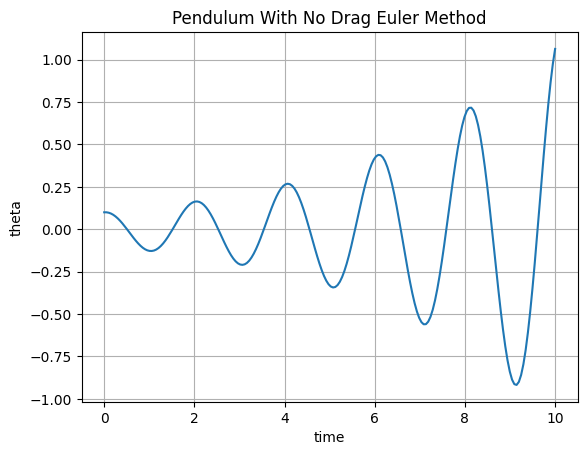

In [3]:
plt.plot(time, theta)
plt.grid("--")
plt.title("Pendulum With No Drag Euler Method")
plt.xlabel("time")
plt.ylabel("theta")

### **Péndulo Simple con Euler-Cromer**

Tenemos el mismo caso anterior pero numéricamente es de la siguiente forma:

$$\omega_{i+1} = \omega_{i} - Δt(\frac {g}{l} \theta)$$

$$\theta_{i+1} = \theta_{i} + Δt (\omega_{i+1})$$


In [4]:
g = 9.8; thetacromer = [0.2]; wcromer = [0]; l = 1

for i in range(len(time)-1):
  wcromer.append(wcromer[i] - g/l * thetacromer[i] * time[1])
  thetacromer.append(thetacromer[i] + time[1]*(wcromer[i+1]))

Text(0, 0.5, 'theta')

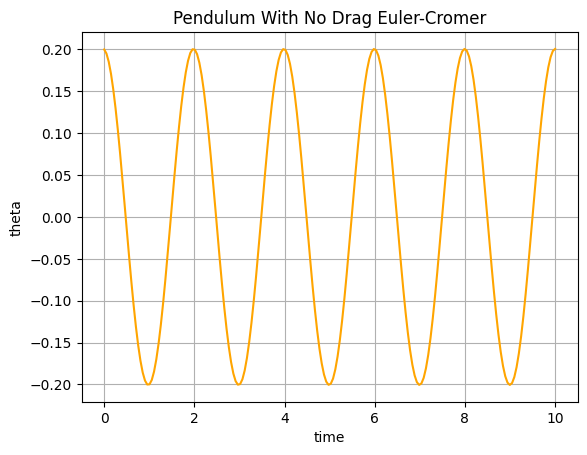

In [5]:
plt.plot(time, thetacromer, color="orange")
plt.grid("--")
plt.title("Pendulum With No Drag Euler-Cromer")
plt.xlabel("time")
plt.ylabel("theta")